## ML4Microbiome Training School 2021
**Author:** Aleksandra Gruca, Silesian University of Technology, Poland

aleksandra.gruca@polsl.pl


The dataset used in this toutorial was downloaded from: [MLRepo](https://knights-lab.github.io/MLRepo/).

[MLRepo paper](https://academic.oup.com/gigascience/article/8/5/giz042/5481665)


The code for the otu table preprocesing is based on the code that can be downloaded from here: https://github.com/knights-lab/MLRepo




#### Dataset description
** Qin 2014  Cirrhosis versus healthy**

| Overview | |
| -------------: |-------------|
| Description      | Cirrhosis versus healthy |
| Study design | Cross-Sectional |
| Topic area | Cirrhosis|
| Attributes | Cirrhotic: Cirrhosis, Healthy|
| Dataset notes | |
| Number of samples | 130|
| Number of subjects | 130|

Literature source: https://pubmed.ncbi.nlm.nih.gov/25079328/

### Laboratory tasks:

1. Reading and preprocessing the data
    - normalizing counts over library size 
    - filtering features by prevalance and corellation


2. Appling several supervised learning models and comparing their performance

3. Comparing the features selected by the best model with the features selected by statistical analysis


Required packages:

- caret
- LiblineaR 
- kernlab
- randomForest
- MLeval
- ALDEx2

In [1]:
task_file = './datasets/qin2014/task-healthy-cirrhosis.txt'

#read the file with information on predictors
task = read.table(task_file, sep="\t", comment="", row=1, head=T, quote="", check.names=F, colClasses="character")

#change the predictor variable to factor
task$Var = as.factor(make.names(task$Var))




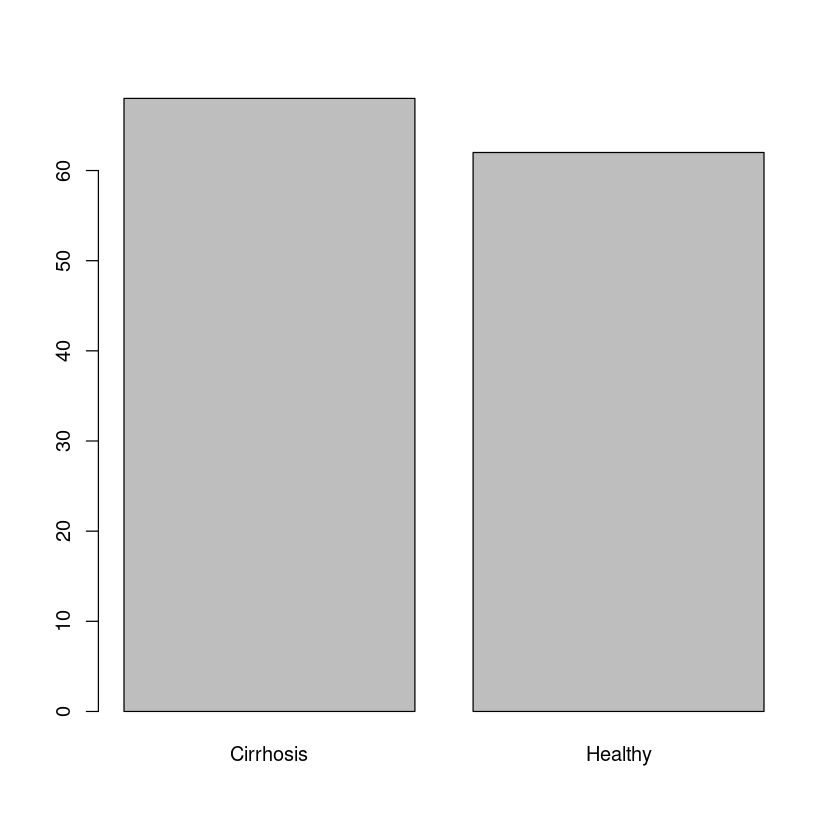

In [2]:
#check the distribution of the samples between classes
plot(task$Var)

In [3]:
otu_table_file = "./datasets/qin2014/otutable.txt"

#read data table
otu = read.table(otu_table_file,sep="\t", comment="", row=1, head=T, quote="", check.names=F)

#transpose the table so now we have objects (patients) in rows and features (OTUs) in columns
otu = t(otu)

In [4]:
#Check dimensions of the otu table
print(paste("rows:",dim(otu)[1],"columns:",dim(otu)[2],sep = " "))
head(otu)

[1] "rows: 130 columns: 8483"


,"NC_012781.1 Eubacterium rectale ATCC 33656, complete genome","NC_006347.1 Bacteroides fragilis YCH46 DNA, complete genome","NC_004663.1 Bacteroides thetaiotaomicron VPI-5482 chromosome, complete genome","NC_004337.2 Shigella flexneri 2a str. 301 chromosome, complete genome","NC_002695.1 Escherichia coli O157:H7 str. Sakai, complete genome","NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome","NC_000907.1 Haemophilus influenzae Rd KW20 chromosome, complete genome","NC_000896.1 Lactobacillus prophage phiadh, complete genome","NC_000872.1 Streptococcus phage Sfi21, complete genome","NC_000871.1 Streptococcus phage Sfi19, complete genome",⋯,"NZ_LN908984.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00007, whole genome shotgun sequence","NZ_LN908986.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00009, whole genome shotgun sequence","NZ_LN908985.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00008, whole genome shotgun sequence","NZ_LN912997.1 Ruminococcus sp. AT10 genome assembly Ruminococcus phoceensis, scaffold scaffold00001, whole genome shotgun sequence","NZ_LN912998.1 Ruminococcus sp. AT10 genome assembly Ruminococcus phoceensis, scaffold scaffold00002, whole genome shotgun sequence","NZ_LT629939.1 Phocea massiliensis strain Marseille-P2769, whole genome shotgun sequence","NZ_LT575468.1 Plesiomonas shigelloides strain NCTC10360 genome assembly, chromosome: 1","NZ_LT571436.1 Neisseria weaveri strain NCTC13585 genome assembly, chromosome: 1","NZ_LT603683.1 Bacillus glycinifermentans isolate BGLY genome assembly, chromosome: 1","NZ_LT630450.1 Desulfovibrio piger isolate DESPIGER1 genome assembly, chromosome: I"
LD.73,772362,985222,1132274,6791,5607,167766,76,0,0,0,⋯,0,0,0,0,0,494,2,0,0,21
LD.11,215106,132056,442525,45,44,765,4,0,0,0,⋯,0,0,0,0,0,2788,2,0,0,58
LD.26,762022,589642,109962,9093,6688,165958,4674,0,0,0,⋯,6,0,0,0,0,488,12,4,0,0
HD.61,271998,186254,267920,22,36,302,0,0,0,0,⋯,0,0,0,0,0,1750,0,0,0,22
LD.61,1156,137271,775077,3797,3624,72651,220,0,0,0,⋯,0,0,0,0,0,16,2,0,0,0
LD.77,31558,1202090,767396,2723,2723,44082,20723,0,0,0,⋯,0,0,0,16,0,400,345,0,0,0


### Total Sum Scailing

Below we will use total sum scaling (TSS) to normalize OTU read counts. TSS simply transforms the abundance table (feature table) into relative abundance table, i.e. scale by each sample’s library size.

This is one of the simplest normalization methods but it is known to have a bias in differential abundance estimates
So usually it is not the best choice but stil quite popular as it total sums are easy to interpret by humans. 
A nice survey of different normalization methods can be found in the paper by *Lin and Peddata 2020*:  

https://www.nature.com/articles/s41522-020-00160-w

In [5]:
#normalize otu table by total sum normalization
otu = sweep(otu,1, rowSums(otu), '/')
head(otu)

,"NC_012781.1 Eubacterium rectale ATCC 33656, complete genome","NC_006347.1 Bacteroides fragilis YCH46 DNA, complete genome","NC_004663.1 Bacteroides thetaiotaomicron VPI-5482 chromosome, complete genome","NC_004337.2 Shigella flexneri 2a str. 301 chromosome, complete genome","NC_002695.1 Escherichia coli O157:H7 str. Sakai, complete genome","NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome","NC_000907.1 Haemophilus influenzae Rd KW20 chromosome, complete genome","NC_000896.1 Lactobacillus prophage phiadh, complete genome","NC_000872.1 Streptococcus phage Sfi21, complete genome","NC_000871.1 Streptococcus phage Sfi19, complete genome",⋯,"NZ_LN908984.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00007, whole genome shotgun sequence","NZ_LN908986.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00009, whole genome shotgun sequence","NZ_LN908985.1 Eggerthellaceae bacterium AT8 genome assembly Hugonella massiliensis, scaffold scaffold00008, whole genome shotgun sequence","NZ_LN912997.1 Ruminococcus sp. AT10 genome assembly Ruminococcus phoceensis, scaffold scaffold00001, whole genome shotgun sequence","NZ_LN912998.1 Ruminococcus sp. AT10 genome assembly Ruminococcus phoceensis, scaffold scaffold00002, whole genome shotgun sequence","NZ_LT629939.1 Phocea massiliensis strain Marseille-P2769, whole genome shotgun sequence","NZ_LT575468.1 Plesiomonas shigelloides strain NCTC10360 genome assembly, chromosome: 1","NZ_LT571436.1 Neisseria weaveri strain NCTC13585 genome assembly, chromosome: 1","NZ_LT603683.1 Bacillus glycinifermentans isolate BGLY genome assembly, chromosome: 1","NZ_LT630450.1 Desulfovibrio piger isolate DESPIGER1 genome assembly, chromosome: I"
LD.73,0.0546516704,0.069713461,0.080118734,4.805253e-04,3.967465e-04,1.187098e-02,5.377695e-06,0,0,0,⋯,0.000000e+00,0,0,0.000000e+00,0,3.495501e-05,1.415183e-07,0.000000e+00,0,1.485942e-06
LD.11,0.0078688638,0.004830784,0.016188154,1.646160e-06,1.609579e-06,2.798472e-05,1.463253e-07,0,0,0,⋯,0.000000e+00,0,0,0.000000e+00,0,1.019888e-04,7.316266e-08,0.000000e+00,0,2.121717e-06
LD.26,0.0652695615,0.050504677,0.009418588,7.788438e-04,5.728481e-04,1.421482e-02,4.003427e-04,0,0,0,⋯,5.139187e-07,0,0,0.000000e+00,0,4.179872e-05,1.027837e-06,3.426125e-07,0,0.000000e+00
HD.61,0.0287832287,0.019709672,0.028351689,2.328072e-06,3.809573e-06,3.195808e-05,0.000000e+00,0,0,0,⋯,0.000000e+00,0,0,0.000000e+00,0,1.851876e-04,0.000000e+00,0.000000e+00,0,2.328072e-06
LD.61,0.0001614375,0.019170139,0.108240879,5.302578e-04,5.060980e-04,1.014584e-02,3.072339e-05,0,0,0,⋯,0.000000e+00,0,0,0.000000e+00,0,2.234428e-06,2.793036e-07,0.000000e+00,0,0.000000e+00
LD.77,0.0015918394,0.060635473,0.038708765,1.373528e-04,1.373528e-04,2.223571e-03,1.045304e-03,0,0,0,⋯,0.000000e+00,0,0,8.070673e-07,0,2.017668e-05,1.740239e-05,0.000000e+00,0,0.000000e+00


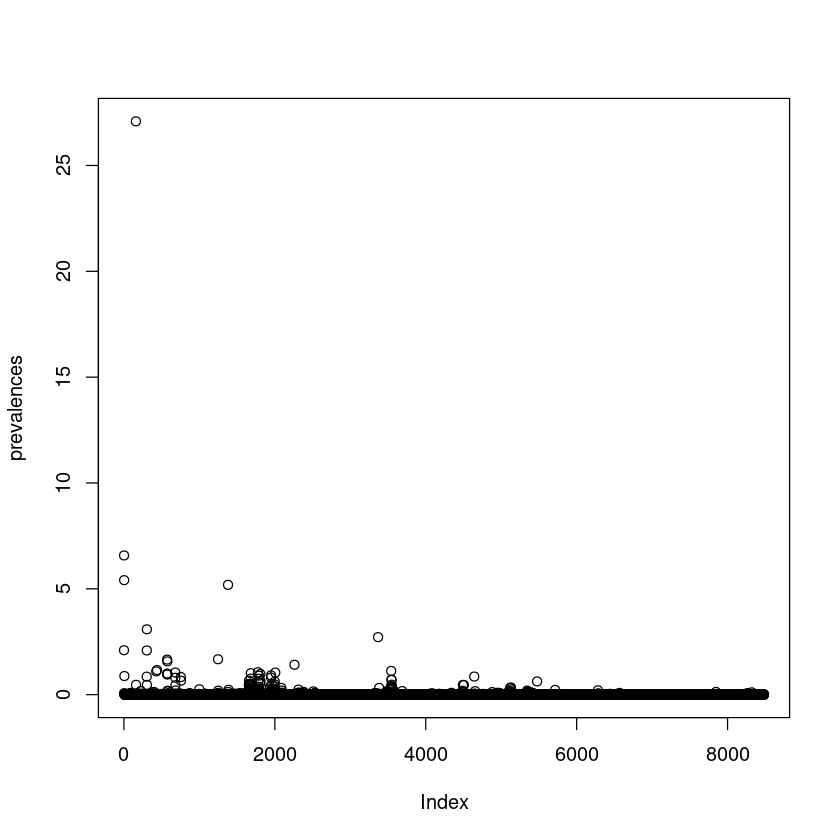

In [6]:
#Check how the data looks like in terms of OTU prevalences
prevalences = apply(otu, 2, function(x) sum(x))
plot(prevalences)

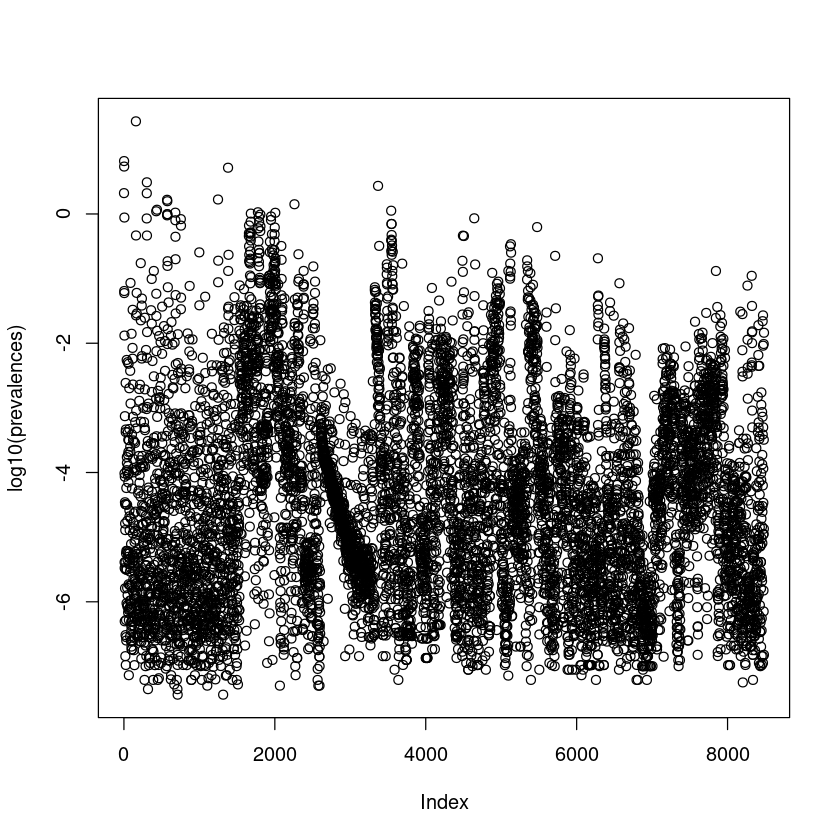

In [7]:
plot(log10(prevalences))

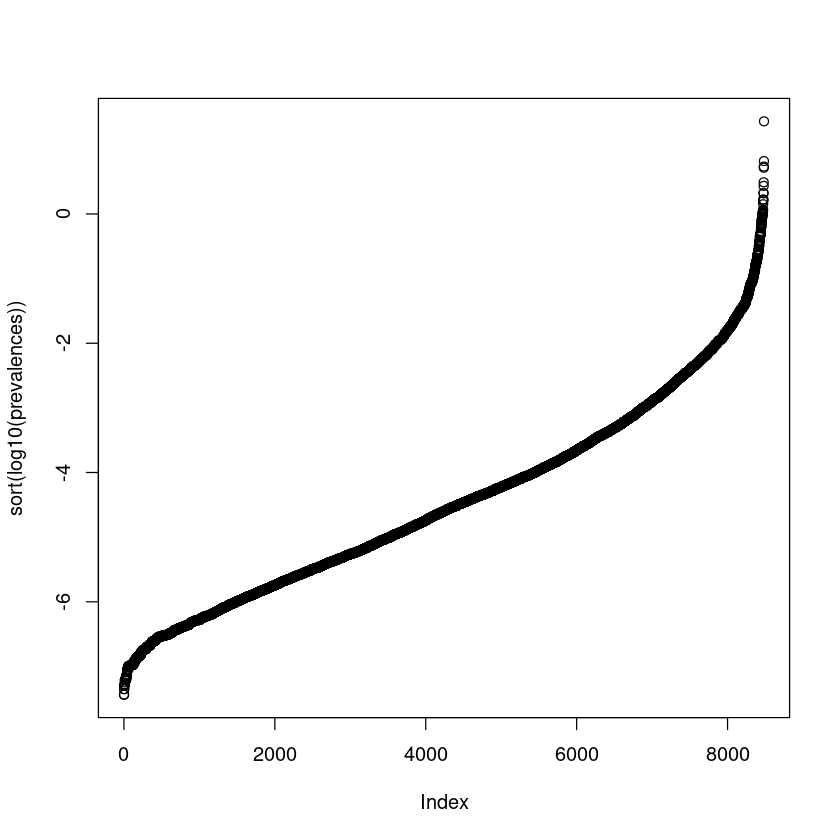

In [8]:
plot(sort(log10(prevalences)))

In [9]:
prevalances = apply(otu, 2, function(x) mean(x>0))

#select only those outs with prevalence above a certain treshold threshol
otu = otu[, prevalances >= 0.1]

In [10]:
#check how many OTUs were left in the table after filtering by prevalence
dim(otu)

[1]  130 4511

In [11]:
#filter features by correlation similarity
#find cluster of features with  internal complete-linkage correlation of 0.95
#choose cluster representation as a highest-variance member (with the hightest mean)

#code source from https://github.com/knights-lab/MLRepo
source("./helpers/collapse-features.r")

In [12]:
ret <- collapse.by.correlation(otu, .95 , verbose=TRUE)

Clustering 4511 features...getting means...choosing reps...collapsed from 4511 to 2977.


In [13]:
otu = otu[, ret$reps]

In [14]:
#check how many OTUs were left in the table after filtering by prevalence by correlation similarity
dim(otu)

[1]  130 2977

In [15]:
require(caret)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice



### Caret

The caret package (short for **C**lassification **A**nd **RE**gression **T**raining) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for:

* data splitting
* pre-processing
* feature selection
* model tuning using resampling
* variable importance estimation

The package started of as a way to provide a uniform interface the functions themselves, as well as a way to standardize common tasks (such parameter tuning and variable importance). The package documentation can be found here:
https://topepo.github.io/caret/index.html

And the classification and regression methods that are available within the package can be found here:
https://topepo.github.io/caret/available-models.html

In [16]:
# Let's create train and held-out dataset. 
#We will train our model on the train dataset and we will check the prediction on the  held out dataset

train_indexes = createDataPartition(task$Var, p=0.8, list=FALSE)

otu_train = otu[train_indexes, ]
task_train_var = task$Var[train_indexes]

otu_held_out = otu[-train_indexes, ]
task_held_out = task$Var[-train_indexes]

In [17]:
dim(otu_train)

[1]  105 2977

The function *trainControl* generates parameters that further control how models are created

## Logistic Regression

#### Traning the model using accuracy as a performance measure 

In [18]:
#parameters for nested k-fold cross validations
folds = 5  #10-fold CV
nests = 3  #5 nested

#let's start with accuracy
fitControl <- trainControl(method = "repeatedcv", 
                           number = folds,   #number of folds in k-fold CV
                           repeats = nests,  #number of outer repetitions in nested k-fold CV
                           classProbs = TRUE,
                           savePredictions = TRUE)


set.seed(825)
regLog_model <- train(x = otu_train, y = task_train_var,
               method = "regLogistic", 
               trControl = fitControl)

Logistic regression:

[Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

[Loss Function](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11)


Documentation of LiblineaR function, where you can find what are tuning paramteres *cost*, *loss* and *epsilon*

[LiblineaR](https://www.rdocumentation.org/packages/LiblineaR/versions/2.10-12/topics/LiblineaR)

In [19]:
print(regLog_model)

Regularized Logistic Regression 

 105 samples
2977 predictors
   2 classes: 'Cirrhosis', 'Healthy' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 84, 84, 84, 84, 84, 84, ... 
Resampling results across tuning parameters:

  cost  loss       epsilon  Accuracy   Kappa       
  0.5   L1         0.001    0.4761905   0.000000000
  0.5   L1         0.010    0.4761905   0.000000000
  0.5   L1         0.100    0.4761905   0.000000000
  0.5   L2_dual    0.001    0.5174603  -0.010591900
  0.5   L2_dual    0.010    0.5174603  -0.010591900
  0.5   L2_dual    0.100    0.5206349  -0.004326269
  0.5   L2_primal  0.001    0.5174603  -0.010591900
  0.5   L2_primal  0.010    0.5174603  -0.010591900
  0.5   L2_primal  0.100    0.5142857  -0.016799247
  1.0   L1         0.001    0.5238095   0.000000000
  1.0   L1         0.010    0.5238095   0.000000000
  1.0   L1         0.100    0.5238095   0.000000000
  1.0   L2_dual    0.001    0.5079365  -0.028582

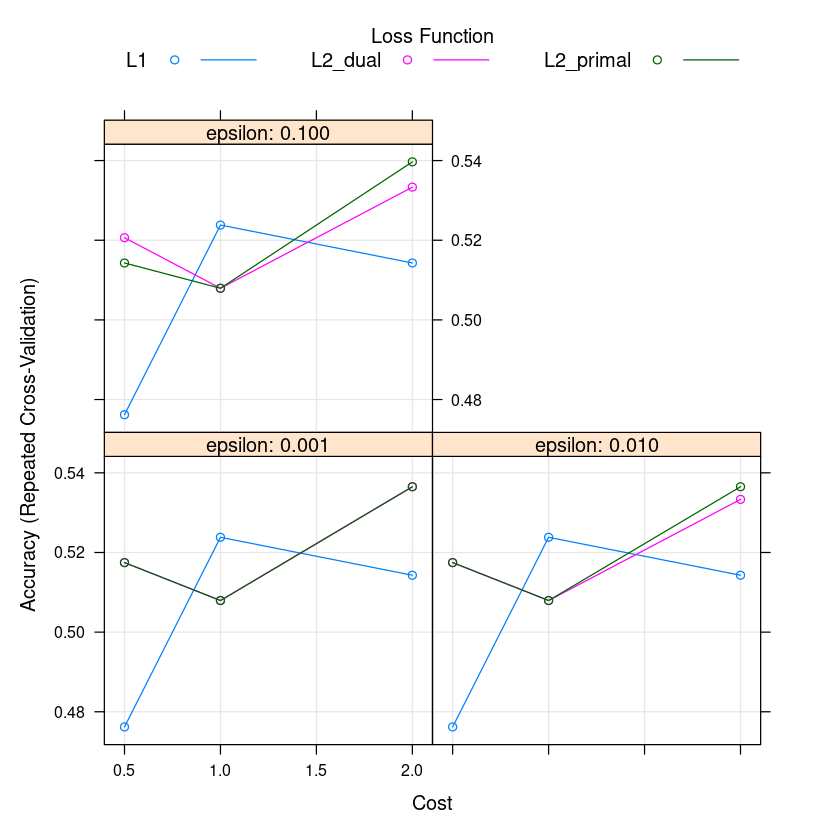

In [20]:
plot(regLog_model)

#### Training the model using ROC as the performance measure

In [21]:
fitControl <- trainControl(method = "repeatedcv", 
                           number = folds,   #number of folds in k-fold CV
                           repeats = nests,  #number of outer repetitions in nested k-fold CV
                           classProbs = TRUE,
                           savePredictions = TRUE,
                           summaryFunction = twoClassSummary)


set.seed(825)
regLog_model <- train(x = otu_train, y = task_train_var,
               method = "regLogistic", 
               trControl = fitControl,
               metric = "ROC")

In [22]:
print(regLog_model)
#Sens = TP / (TP+FN)  
#Spec = TN / (TN+FP)

Regularized Logistic Regression 

 105 samples
2977 predictors
   2 classes: 'Cirrhosis', 'Healthy' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 84, 84, 84, 84, 84, 84, ... 
Resampling results across tuning parameters:

  cost  loss       epsilon  ROC        Sens       Spec       
  0.5   L1         0.001    0.5000000  0.0000000  1.000000000
  0.5   L1         0.010    0.5000000  0.0000000  1.000000000
  0.5   L1         0.100    0.5000000  0.0000000  1.000000000
  0.5   L2_dual    0.001    0.6296970  0.9696970  0.020000000
  0.5   L2_dual    0.010    0.6296970  0.9696970  0.020000000
  0.5   L2_dual    0.100    0.6284848  0.9757576  0.020000000
  0.5   L2_primal  0.001    0.6290909  0.9696970  0.020000000
  0.5   L2_primal  0.010    0.6296970  0.9696970  0.020000000
  0.5   L2_primal  0.100    0.6157576  0.9636364  0.020000000
  1.0   L1         0.001    0.5000000  1.0000000  0.000000000
  1.0   L1         0.010    0.5000000  1.0

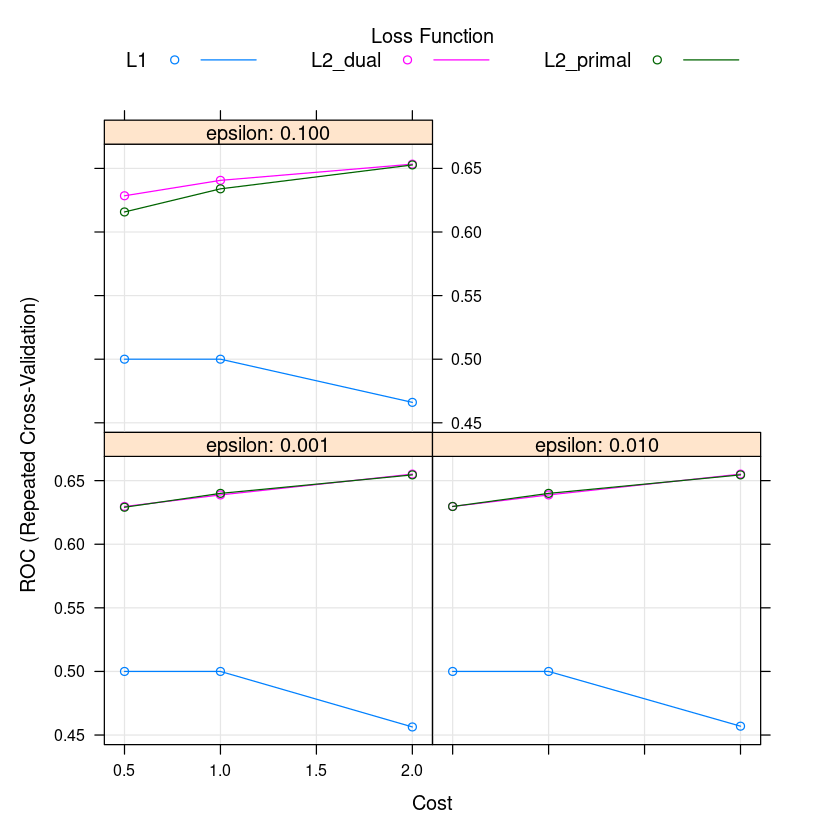

In [23]:
plot(regLog_model)

In [24]:
#load the library that will let us easily plot ROC curves
library(MLeval)

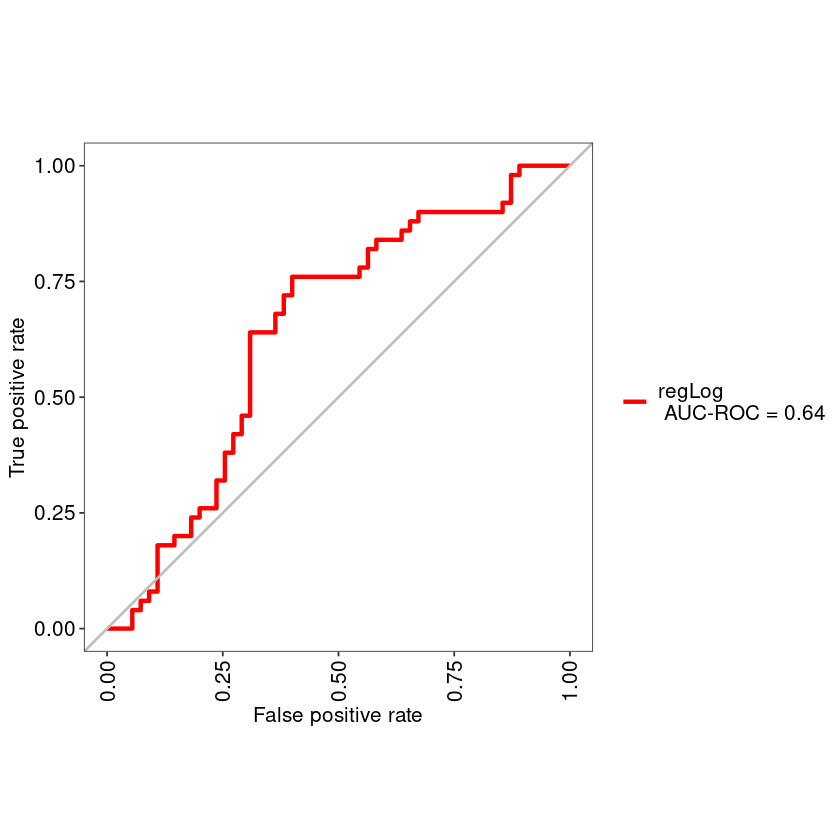

In [25]:
rec = evalm(list(regLog_model), gnames = c('regLog'), plots = c("r"), silent = TRUE)

In [26]:
pred = predict(regLog_model, otu_held_out)

In [27]:
confusionMatrix(table(task_held_out, pred))

Confusion Matrix and Statistics

             pred
task_held_out Cirrhosis Healthy
    Cirrhosis        10       3
    Healthy           9       3
                                         
               Accuracy : 0.52           
                 95% CI : (0.3131, 0.722)
    No Information Rate : 0.76           
    P-Value [Acc > NIR] : 0.9977         
                                         
                  Kappa : 0.0196         
                                         
 Mcnemar's Test P-Value : 0.1489         
                                         
            Sensitivity : 0.5263         
            Specificity : 0.5000         
         Pos Pred Value : 0.7692         
         Neg Pred Value : 0.2500         
             Prevalence : 0.7600         
         Detection Rate : 0.4000         
   Detection Prevalence : 0.5200         
      Balanced Accuracy : 0.5132         
                                         
       'Positive' Class : Cirrhosis      
             

## Support Vector Machienes

In [28]:
require(kernlab)

Loading required package: kernlab


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [29]:
fitControl <- trainControl(method = "repeatedcv", 
                           number = folds,   #number of folds in k-fold CV
                           repeats = nests,  #number of outer repetitions in nested k-fold CV
                           classProbs = TRUE,
                           savePredictions = TRUE,
                           summaryFunction = twoClassSummary)


set.seed(825)
svm_model <- train(x = otu_train, y = task_train_var,
               method = "svmRadial",  
               trControl = fitControl,
               metric = "ROC")

In [30]:
print(svm_model)

Support Vector Machines with Radial Basis Function Kernel 

 105 samples
2977 predictors
   2 classes: 'Cirrhosis', 'Healthy' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 84, 84, 84, 84, 84, 84, ... 
Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.25  0.7160606  0.8242424  0.4266667
  0.50  0.7163636  0.8060606  0.4333333
  1.00  0.7493939  0.9333333  0.3333333

Tuning parameter 'sigma' was held constant at a value of 0.0002628335
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0002628335 and C = 1.


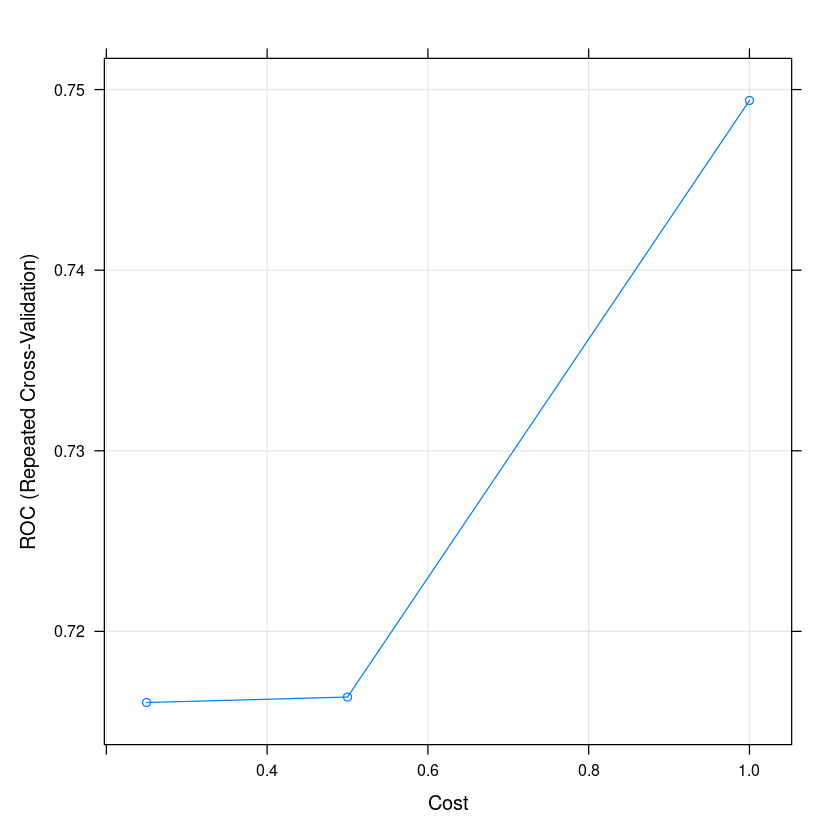

In [31]:
plot(svm_model)

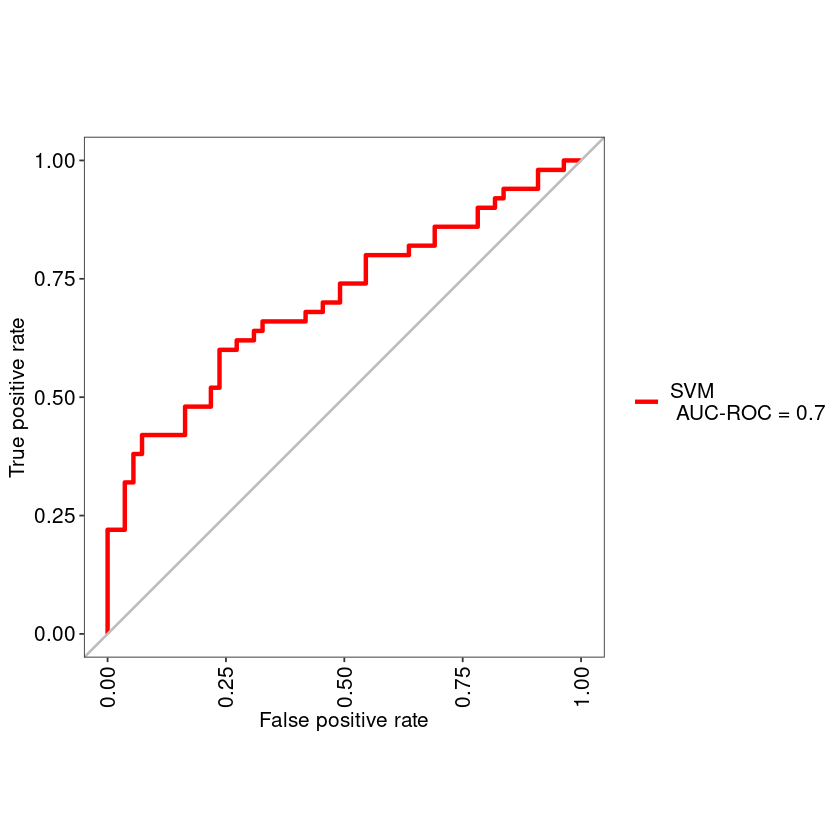

In [32]:
rec = evalm(list(svm_model), gnames = c('SVM'), plots = c("r"), silent = TRUE)

In [33]:
pred = predict(svm_model, otu_held_out)
confusionMatrix(table(task_held_out, pred))

Confusion Matrix and Statistics

             pred
task_held_out Cirrhosis Healthy
    Cirrhosis        10       3
    Healthy           5       7
                                         
               Accuracy : 0.68           
                 95% CI : (0.465, 0.8505)
    No Information Rate : 0.6            
    P-Value [Acc > NIR] : 0.2735         
                                         
                  Kappa : 0.3548         
                                         
 Mcnemar's Test P-Value : 0.7237         
                                         
            Sensitivity : 0.6667         
            Specificity : 0.7000         
         Pos Pred Value : 0.7692         
         Neg Pred Value : 0.5833         
             Prevalence : 0.6000         
         Detection Rate : 0.4000         
   Detection Prevalence : 0.5200         
      Balanced Accuracy : 0.6833         
                                         
       'Positive' Class : Cirrhosis      
             

## Random Forests

In [34]:
fitControl <- trainControl(method = "repeatedcv", 
                           number = folds,   #number of folds in k-fold CV
                           repeats = nests,  #number of outer repetitions in nested k-fold CV
                           classProbs = TRUE,
                           savePredictions = TRUE,
                           summaryFunction = twoClassSummary)


set.seed(825)
rf_model <- train(x = otu_train, y = task_train_var,
               method = "rf",  
               trControl = fitControl,
               metric = "ROC")

In [35]:
print(rf_model)

Random Forest 

 105 samples
2977 predictors
   2 classes: 'Cirrhosis', 'Healthy' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 84, 84, 84, 84, 84, 84, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
     2  0.8948485  0.7454545  0.8133333
    77  0.9163636  0.7878788  0.9000000
  2977  0.9196970  0.8363636  0.9133333

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2977.


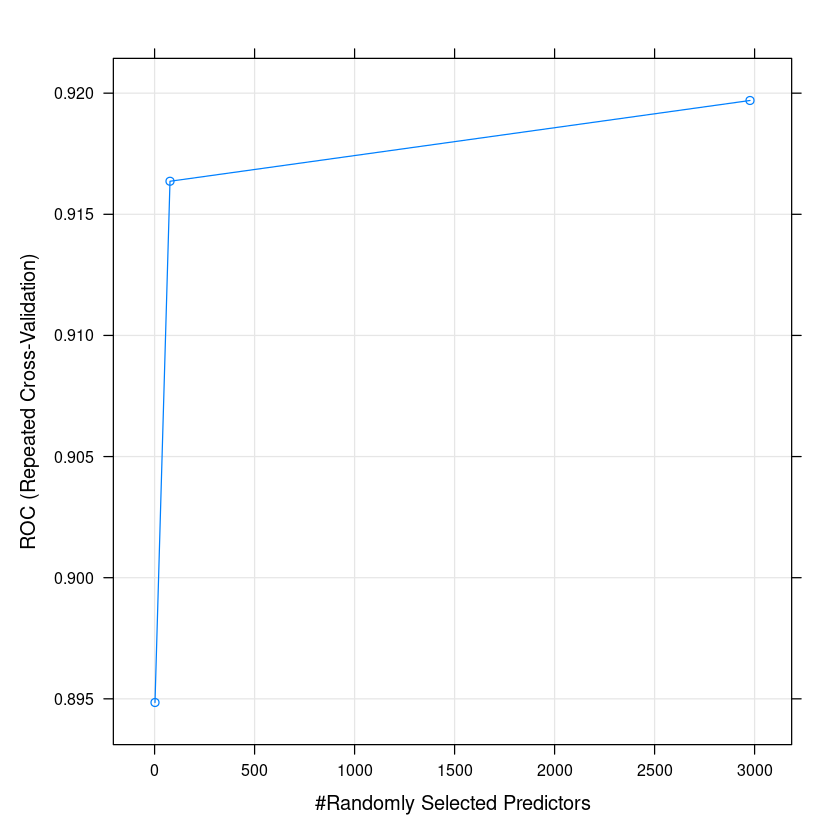

In [36]:
plot(rf_model)

In [37]:
rf_model$finalModel$ntree

[1] 500

### Radom Forest - parameter tuning

In [38]:
# this might take too much time
fitControl <- trainControl(method = "repeatedcv", 
                           number = folds,   #number of folds in k-fold CV
                           repeats = nests,  #number of outer repetitions in nested k-fold CV
                           classProbs = TRUE,  
                           summaryFunction=twoClassSummary,
                           search='grid',
                           savePredictions = TRUE)

#create tunegrid with 15 values from 100:115 for mtry to tunning model. Our train function will change number of entry variable at each split according to tunegrid. 
tunegrid <- expand.grid(.mtry = (100:115)) 

rf_gridsearch <- train(x = otu_train, y = task_train_var,
               method = "rf", 
               trControl = fitControl, 
               metric = "ROC",
               tuneGrid = tunegrid)

print(rf_gridsearch)


Random Forest 

 105 samples
2977 predictors
   2 classes: 'Cirrhosis', 'Healthy' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 84, 84, 84, 84, 84, 84, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  100   0.9236364  0.8121212  0.8866667
  101   0.9175758  0.8060606  0.8866667
  102   0.9181818  0.8121212  0.8666667
  103   0.9254545  0.8121212  0.9000000
  104   0.9218182  0.7939394  0.8933333
  105   0.9200000  0.8060606  0.8866667
  106   0.9248485  0.8121212  0.8933333
  107   0.9242424  0.8121212  0.8866667
  108   0.9221212  0.8181818  0.8733333
  109   0.9200000  0.8181818  0.8733333
  110   0.9200000  0.8060606  0.8800000
  111   0.9209091  0.8000000  0.8866667
  112   0.9239394  0.8060606  0.8866667
  113   0.9233333  0.8181818  0.8800000
  114   0.9212121  0.8060606  0.8866667
  115   0.9224242  0.8121212  0.9000000

ROC was used to select the optimal model using the largest va

A very nice blog post that discuss in more details how to tune paramteres for RF model using caret

https://rpubs.com/phamdinhkhanh/389752

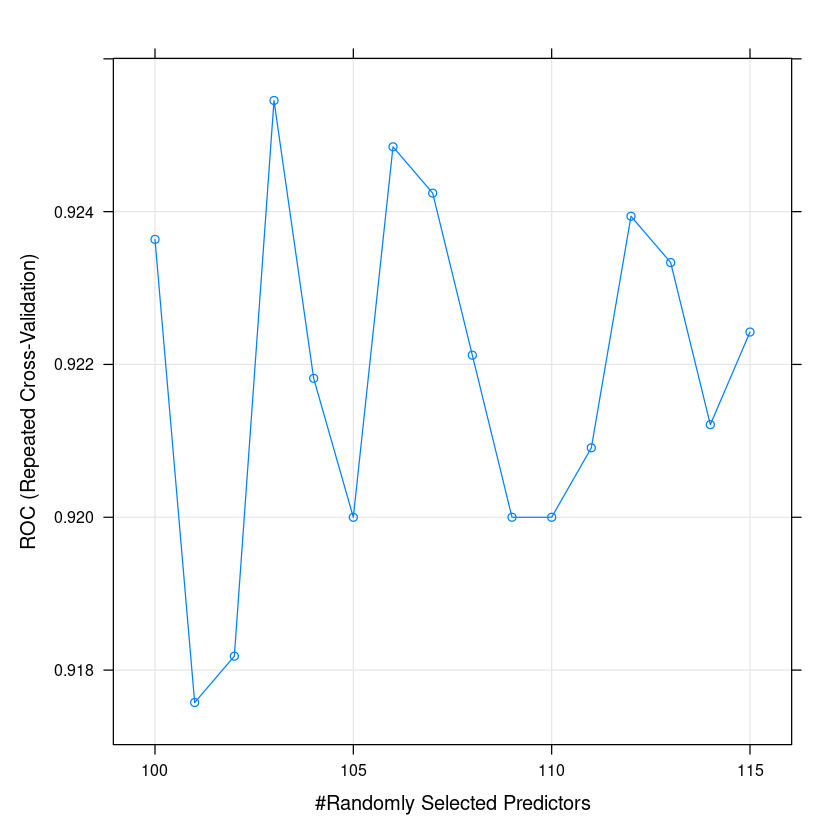

In [39]:
plot(rf_gridsearch)

In [40]:
rf_model = rf_gridsearch

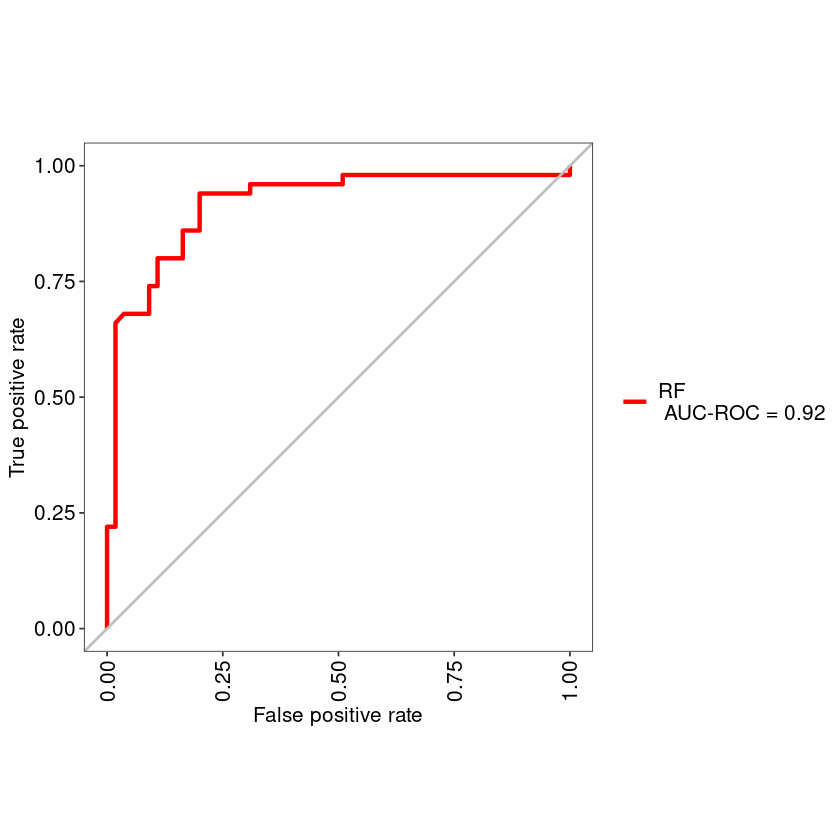

In [41]:
rec = evalm(list(rf_model), gnames = c('RF'), plots = c("r"), silent = TRUE)

In [42]:
pred = predict(rf_model, otu_held_out)
confusionMatrix(table(task_held_out, pred))

Confusion Matrix and Statistics

             pred
task_held_out Cirrhosis Healthy
    Cirrhosis         8       5
    Healthy           0      12
                                         
               Accuracy : 0.8            
                 95% CI : (0.593, 0.9317)
    No Information Rate : 0.68           
    P-Value [Acc > NIR] : 0.14069        
                                         
                  Kappa : 0.6057         
                                         
 Mcnemar's Test P-Value : 0.07364        
                                         
            Sensitivity : 1.0000         
            Specificity : 0.7059         
         Pos Pred Value : 0.6154         
         Neg Pred Value : 1.0000         
             Prevalence : 0.3200         
         Detection Rate : 0.3200         
   Detection Prevalence : 0.5200         
      Balanced Accuracy : 0.8529         
                                         
       'Positive' Class : Cirrhosis      
             

In [43]:
V = varImp(rf_model, scale = FALSE)

In [44]:
print(V)

rf variable importance

  only 20 most important variables shown (out of 2977)

                                                                                                                    Overall
NZ_GL538208.1 Megasphaera micronuciformis F0359 Scfld98, whole genome shotgun sequence                               1.2720
NC_013520.1 Veillonella parvula DSM 2008, complete genome                                                            1.2512
NZ_CP007062.1 Fusobacterium nucleatum subsp. animalis 7_1, complete genome                                           0.9611
NZ_GL732439.1 Streptococcus infantis ATCC 700779 genomic scaffold SCAFFOLD1, whole genome shotgun sequence           0.9370
NZ_KE384564.1 Veillonella montpellierensis DSM 17217 K357DRAFT_scaffold00008.8, whole genome shotgun sequence        0.9136
NZ_KE384565.1 Veillonella montpellierensis DSM 17217 K357DRAFT_scaffold00019.19, whole genome shotgun sequence       0.8899
NZ_CP009913.1 Streptococcus salivarius strain NCTC 8

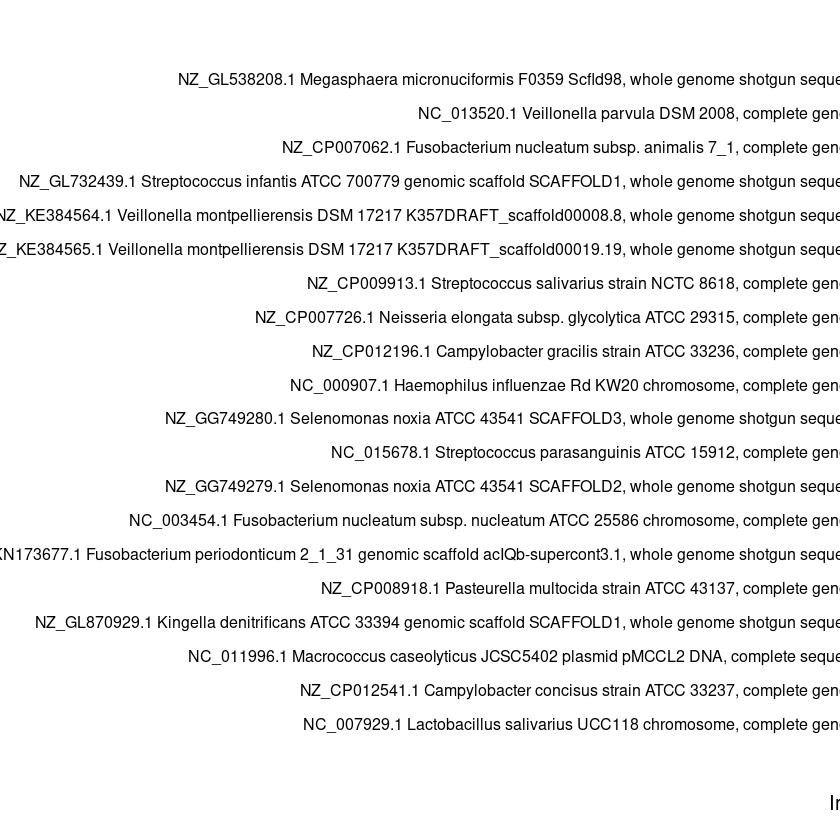

In [45]:
plot(V, top = 20)

In [46]:
#shorten row names 
tmp = row.names(V$importance)
tmp = substring(tmp, first = 1, last = 20)
row.names(V$importance) = tmp

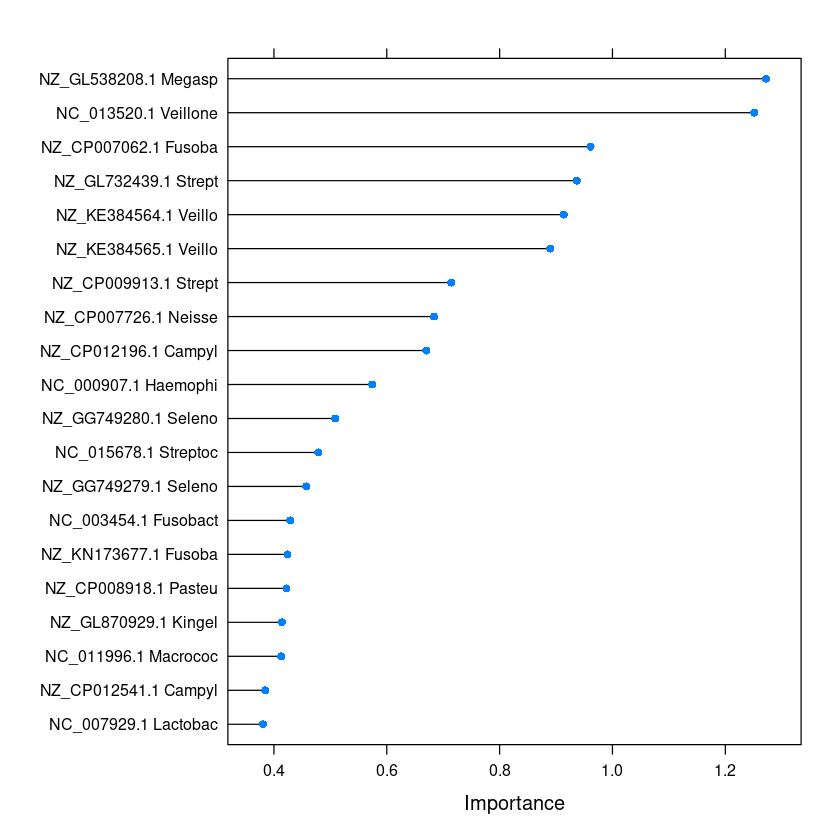

In [47]:
plot( V, 20)

### Models comparision 

In [48]:
resamps <- resamples(list(LogReg = regLog_model,
                          SVM = svm_model,
                          RF = rf_model))
resamps


Call:
resamples.default(x = list(LogReg = regLog_model, SVM = svm_model, RF
 = rf_model))

Models: LogReg, SVM, RF 
Number of resamples: 15 
Performance metrics: ROC, Sens, Spec 
Time estimates for: everything, final model fit 

In [49]:
summary(resamps)


Call:
summary.resamples(object = resamps)

Models: LogReg, SVM, RF 
Number of resamples: 15 

ROC 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LogReg 0.4636364 0.6000000 0.6636364 0.6551515 0.7500000 0.7727273    0
SVM    0.5272727 0.6954545 0.7454545 0.7493939 0.8227273 0.9000000    0
RF     0.7727273 0.8909091 0.9363636 0.9254545 0.9818182 1.0000000    0

Sens 
            Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
LogReg 0.5454545 0.9090909 1.0000000 0.9151515 1.0000000    1    0
SVM    0.8181818 0.9090909 0.9090909 0.9333333 1.0000000    1    0
RF     0.5454545 0.7272727 0.8181818 0.8121212 0.9090909    1    0

Spec 
       Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
LogReg  0.0    0.00    0.1 0.1200000    0.20  0.5    0
SVM     0.1    0.20    0.2 0.3333333    0.55  0.6    0
RF      0.6    0.85    0.9 0.9000000    1.00  1.0    0


There are several lattice plot methods that can be used to visualize the resampling distributions: density plots, box-whisker plots, scatterplot matrices and scatterplots of summary statistics. For example:

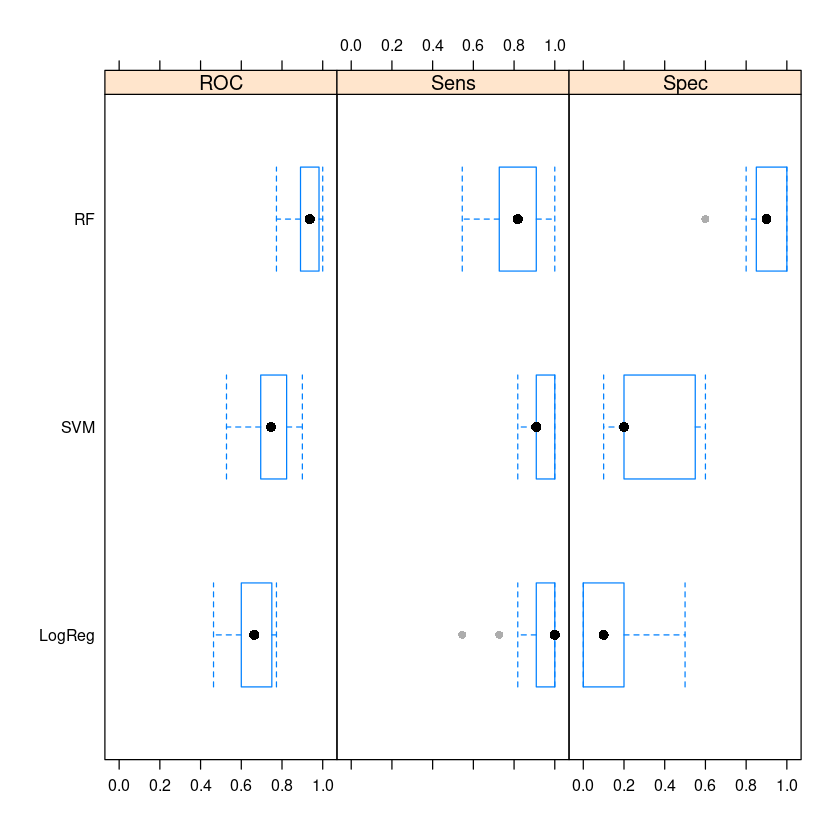

In [50]:
theme1 <- trellis.par.get()
theme1$plot.symbol$col = rgb(.2, .2, .2, .4)
theme1$plot.symbol$pch = 16
theme1$plot.line$col = rgb(1, 0, 0, .7)
theme1$plot.line$lwd <- 2
trellis.par.set(theme1)
bwplot(resamps, layout = c(3, 1))

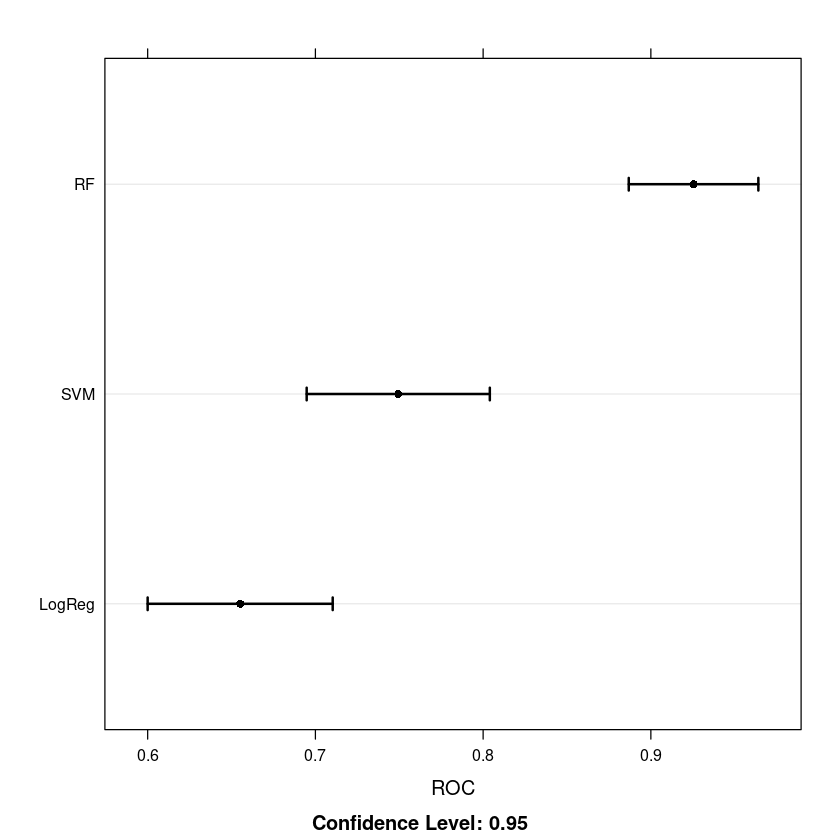

In [51]:
trellis.par.set(caretTheme())
dotplot(resamps, metric = "ROC")

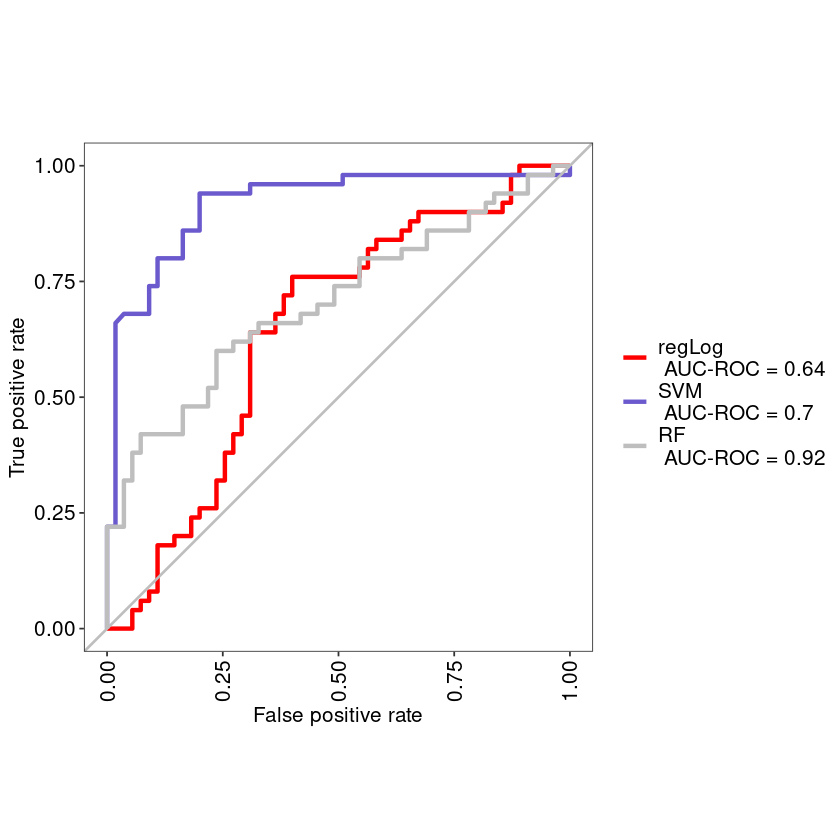

In [52]:
res <- evalm(list(regLog_model, svm_model, rf_model),
             gnames = c('regLog','SVM','RF'), 
             plots = c("r") , 
             silent = TRUE )

In [53]:
require(ALDEx2)

Loading required package: ALDEx2

Loading required package: zCompositions

Loading required package: MASS

Loading required package: NADA

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster



Attaching package: ‘NADA’


The following object is masked from ‘package:stats’:

    cor


Loading required package: truncnorm

Loading required package: Rfast

Loading required package: Rcpp

Loading required package: RcppZiggurat



ALDEx2: ANOVA-Like Differential Expression tool for compositional data

https://bioc.ism.ac.jp/packages/3.3/bioc/vignettes/ALDEx2/inst/doc/ALDEx2_vignette.pdf

In [54]:
otu_table_file = "./datasets/qin2014/otutable.txt"

#read data table
otu_DF = read.table(otu_table_file, sep="\t", comment="", row=1, head=T, check.names=F, quote="")

#read the file with information on predictors
task = read.table(task_file, sep="\t", comment="", row=1, head=T, quote="", check.names=F, colClasses="character")

*We recommend 128 or more mc.samples for the t-test, 1000 for a rigorous effect size calculation, and at least 16 for ANOVA*

In [55]:
#Generate Monte Carlo samples of the Dirichlet distribution for each sample and normalize the sample with centred log-ratio transform 
x = aldex.clr(otu_DF, task$Var, mc.samples=128, denom="all")

#find the most signiciant features
ttest_test = aldex.ttest(x)



operating in serial mode

computing center with all features



In [56]:
head(ttest_test,10)

,we.ep,we.eBH,wi.ep,wi.eBH
,<dbl>,<dbl>,<dbl>,<dbl>
"NC_012781.1 Eubacterium rectale ATCC 33656, complete genome",1.518374e-03,1.878559e-02,2.121106e-03,2.308222e-02
"NC_006347.1 Bacteroides fragilis YCH46 DNA, complete genome",1.265795e-01,3.727452e-01,3.406140e-01,6.240711e-01
"NC_004663.1 Bacteroides thetaiotaomicron VPI-5482 chromosome, complete genome",2.276357e-01,5.159329e-01,1.722344e-01,4.348209e-01
"NC_004337.2 Shigella flexneri 2a str. 301 chromosome, complete genome",2.764440e-01,5.646678e-01,5.193723e-02,2.105809e-01
"NC_002695.1 Escherichia coli O157:H7 str. Sakai, complete genome",5.728911e-01,8.018017e-01,1.366191e-01,3.800774e-01
"NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome",2.094522e-01,4.934269e-01,5.643092e-02,2.222215e-01
"NC_000907.1 Haemophilus influenzae Rd KW20 chromosome, complete genome",1.255264e-08,1.384403e-06,5.257906e-10,1.516661e-07
"NC_000896.1 Lactobacillus prophage phiadh, complete genome",2.449610e-01,4.239818e-01,2.668288e-01,4.495250e-01
"NC_000872.1 Streptococcus phage Sfi21, complete genome",4.039796e-01,6.034673e-01,3.801020e-01,5.774296e-01


In [57]:
ttest_test_sortedBH = ttest_test[order(ttest_test$wi.eBH), ]

In [58]:
head(ttest_test_sortedBH,10)

,we.ep,we.eBH,wi.ep,wi.eBH
,<dbl>,<dbl>,<dbl>,<dbl>
"NZ_GL538208.1 Megasphaera micronuciformis F0359 Scfld98, whole genome shotgun sequence",7.505785e-13,5.534507e-10,1.698621e-13,5.640321e-10
"NC_013520.1 Veillonella parvula DSM 2008, complete genome",1.246671e-17,1.045848e-13,2.004450e-13,6.748435e-10
"NZ_CP007062.1 Fusobacterium nucleatum subsp. animalis 7_1, complete genome",2.055211e-11,6.488756e-09,1.105886e-12,1.836036e-09
"NZ_GL538181.1 Megasphaera micronuciformis F0359 Scfld11, whole genome shotgun sequence",1.352885e-11,5.400750e-09,7.349284e-12,5.359485e-09
"NC_022239.1 Streptococcus anginosus C238, complete genome",5.681076e-11,1.542530e-08,7.811686e-12,7.411266e-09
"NZ_GL538194.1 Megasphaera micronuciformis F0359 Scfld29, whole genome shotgun sequence",1.118452e-10,2.826796e-08,2.054697e-11,8.711571e-09
"NZ_GL538184.1 Megasphaera micronuciformis F0359 Scfld14, whole genome shotgun sequence",7.221935e-10,9.523272e-08,1.480800e-11,9.224588e-09
"NC_007929.1 Lactobacillus salivarius UCC118 chromosome, complete genome",3.050480e-11,9.370406e-09,1.416167e-11,1.075152e-08
"NZ_CP007726.1 Neisseria elongata subsp. glycolytica ATCC 29315, complete genome",3.437783e-09,4.545994e-07,1.156752e-10,4.392548e-08


In [59]:
write.table(ttest_test_sortedBH,'qun2014_ttest.txt', quote = FALSE, row.names = TRUE, col.names = NA, sep = '\t')

In [60]:
#let's check how many features are statistically significant assuming alpha = 0.01
sum(ttest_test_sortedBH[, c("wi.eBH")] < 0.01)

[1] 479

In [61]:
aldex_top500 = row.names(ttest_test_sortedBH)[1:500]

In [62]:
aldex_top500[1:10]

[1] "NZ_GL538208.1 Megasphaera micronuciformis F0359 Scfld98, whole genome shotgun sequence"
 [2] "NC_013520.1 Veillonella parvula DSM 2008, complete genome"                             
 [3] "NZ_CP007062.1 Fusobacterium nucleatum subsp. animalis 7_1, complete genome"            
 [4] "NZ_GL538181.1 Megasphaera micronuciformis F0359 Scfld11, whole genome shotgun sequence"
 [5] "NC_022239.1 Streptococcus anginosus C238, complete genome"                             
 [6] "NZ_GL538194.1 Megasphaera micronuciformis F0359 Scfld29, whole genome shotgun sequence"
 [7] "NZ_GL538184.1 Megasphaera micronuciformis F0359 Scfld14, whole genome shotgun sequence"
 [8] "NC_007929.1 Lactobacillus salivarius UCC118 chromosome, complete genome"               
 [9] "NZ_CP007726.1 Neisseria elongata subsp. glycolytica ATCC 29315, complete genome"       
[10] "NZ_GL538191.1 Megasphaera micronuciformis F0359 Scfld22, whole genome shotgun sequence"

In [63]:
V = varImp(rf_model)

In [64]:
#get the table with importance values for features and sort it in decreasing order 
tmp2 = V$importance
tmp2 = tmp2[order(tmp2$Overall, decreasing = TRUE),,drop=FALSE]

In [65]:
#tget the name of the 500 most important features according to RF model
rf_top500 = row.names(tmp2)[1:500]

In [66]:
#check how many of features from RF top 500 overlaps with the features that were assessed 
#as significant by statiscal analysis
overlap = intersect(aldex_top500,rf_top500)

In [67]:
#check how many features overlap
length(overlap)

[1] 200

In [68]:
#print overlapping features 
print(overlap)

  [1] "NZ_GL538208.1 Megasphaera micronuciformis F0359 Scfld98, whole genome shotgun sequence"                                                        
  [2] "NC_013520.1 Veillonella parvula DSM 2008, complete genome"                                                                                     
  [3] "NZ_CP007062.1 Fusobacterium nucleatum subsp. animalis 7_1, complete genome"                                                                    
  [4] "NC_022239.1 Streptococcus anginosus C238, complete genome"                                                                                     
  [5] "NC_007929.1 Lactobacillus salivarius UCC118 chromosome, complete genome"                                                                       
  [6] "NZ_CP007726.1 Neisseria elongata subsp. glycolytica ATCC 29315, complete genome"                                                               
  [7] "NC_015678.1 Streptococcus parasanguinis ATCC 15912, complete genome"                   